In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [206]:
url = 'https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [207]:
# headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:99.0) Gecko/20100101 Firefox/99.0"}

In [208]:
res = requests.get(url)
print(res)

<Response [200]>


In [209]:
data = BeautifulSoup(res.content, 'lxml')
data

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x

In [210]:
type(data)

bs4.BeautifulSoup

In [211]:
m1 = data.find('div', attrs={'class':'_4rR01T'})
print(m1)
print()
print(m1.text)

<div class="_4rR01T">MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce...</div>

MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce...


In [212]:
laptop_names = []
for i in data.findAll('div', attrs={'class':'_4rR01T'}):
    laptop_names.append(i.text)

In [213]:
laptop_names
print(len(laptop_names))

24


In [214]:
laptop_names

['MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce...',
 'MSI GF63 Intel Core i7 12th Gen 12650H - (16 GB/512 GB SSD/Windows 11 Home/8 GB Graphics/NVIDIA GeForc...',
 'HP Intel Intel Core i3 11th Gen 1115G4 - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Lig...',
 'DELL Intel Core i3 12th Gen 1215U - (8 GB/512 GB SSD/Windows 11 Home) New Inspiron 15 Laptop Thin and ...',
 'ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4 - (8 GB/256 GB SSD/Windows 11 Home) X515EA-EJ312W Thin ...',
 'Acer Extensa Intel Core i3 N305 - (8 GB/512 GB SSD/Windows 11 Home) EX215-33 Notebook',
 'MSI Modern 14 Intel Core i3 11th Gen 1115G4 - (8 GB/512 GB SSD/Windows 11 Home) Modern 14 C11M-031IN T...',
 'MSI Katana 17 Intel Core i7 12th Gen 12650H - (16 GB/1 TB SSD/Windows 11 Home/8 GB Graphics/NVIDIA GeF...',
 'CHUWI Intel Core i3 10th Gen 1005G1 - (8 GB/512 GB SSD/Windows 11 Home) CoreBook X Grey Laptop',
 'Lenovo Intel Core i7 12th Gen 1255U - (

In [215]:
m2 = data.find('div', attrs={'class':'_25b18c'})
print(m2)
print(m2.text)

<div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹46,990</div><div class="_3I9_wc _27UcVY">₹<!-- -->67,990</div><div class="_3Ay6Sb"><span>30% off</span></div></div>
₹46,990₹67,99030% off


### Method 1

In [216]:
discount_price, original_price, percent_discount = [], [], []
for i in data.findAll('div', attrs={'class':'_25b18c'}):
    for idx,j in enumerate(i):
        if idx == 0:
            discount_price.append(j.text)
        if idx == 1:
            original_price.append(j.text)
        if idx == 2:
            percent_discount.append(j.text)

In [217]:
print(len(discount_price))
print(len(original_price))
print(len(percent_discount))

29
29
24


### Method 2

In [218]:
for i in data.findAll('div', attrs={'class':'_25b18c'}):
    for idx,j in enumerate(i.children):
        print(idx, j.text)

0 ₹46,990
1 ₹67,990
2 30% off
0 ₹97,990
1 ₹1,11,990
2 12% off
0 ₹31,990
1 ₹47,279
2 32% off
0 ₹36,990
1 ₹61,431
2 39% off
0 ₹29,990
1 ₹44,990
2 33% off
0 ₹28,990
1 ₹43,999
2 34% off
0 ₹28,990
1 ₹52,990
2 45% off
0 ₹1,10,990
1 ₹1,49,990
2 26% off
0 ₹24,990
1 ₹49,990
2 50% off
0 ₹49,990
1 ₹90,000
2 44% off
0 ₹66,890
1 ₹82,990
2 19% off
0 ₹87,990
1 ₹1,15,990
2 24% off
0 ₹48,990
1 ₹85,990
2 43% off
0 ₹44,990
1 ₹82,990
2 45% off
0 ₹34,500
1 ₹59,000
2 41% off
0 ₹28,990
1 ₹48,146
2 39% off
0 ₹59,990
1 ₹81,990
2 26% off
0 ₹57,990
1 ₹84,990
2 31% off
0 ₹23,990
1 ₹36,990
2 35% off
0 ₹38,480
1 ₹62,561
2 38% off
0 ₹86,990
1 ₹1,11,990
2 22% off
0 ₹69,990
1 ₹1,14,990
2 39% off
0 ₹46,490
1 ₹59,109
2 21% off
0 ₹62,990
1 ₹96,999
2 35% off
0 ₹24,990
1 50% off
0 ₹57,990
1 31% off
0 ₹86,990
1 22% off
0 ₹29,990
1 33% off
0 ₹59,990
1 26% off


In [219]:
discount_price = discount_price[:24]
original_price = original_price[:24]
print(len(discount_price))
print(len(original_price))
print(len(percent_discount))
print(len(laptop_names))

24
24
24
24


### Avg rating and total number of reviews

In [220]:
#<div class="gUuXy-"><span id="productRating_LSTCOMGQHRQZSPVRDZEQTPAAX_COMGQHRQZSPVRDZE_" class="_1lRcqv"><div class="_3LWZlK">4.1<img src="data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0cDovL3d3dy53My5vcmcvMjAwMC9zdmciIHdpZHRoPSIxMyIgaGVpZ2h0PSIxMiI+PHBhdGggZmlsbD0iI0ZGRiIgZD0iTTYuNSA5LjQzOWwtMy42NzQgMi4yMy45NC00LjI2LTMuMjEtMi44ODMgNC4yNTQtLjQwNEw2LjUuMTEybDEuNjkgNC4wMSA0LjI1NC40MDQtMy4yMSAyLjg4Mi45NCA0LjI2eiIvPjwvc3ZnPg==" class="_1wB99o"></div></span><span class="_2_R_DZ"><span><span>803 Ratings&nbsp;</span><span class="_13vcmD">&amp;</span><span>&nbsp;146 Reviews</span></span></span></div>

In [221]:
m3 = data.find('div', attrs={'class':'gUuXy-'})
print(m3)
print()
print(m3.text)

<div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTCOMGRDC8SWJGGTZCDYO4OJ_COMGRDC8SWJGGTZC_"><div class="_3LWZlK">4.3</div></span><span class="_2_R_DZ"><span><span>490 Ratings </span><span class="_13vcmD">&amp;</span><span> 45 Reviews</span></span></span></div>

4.3490 Ratings & 45 Reviews


In [222]:
avg_rating, rating_review = [], []
for i in data.findAll('div', attrs={'class':'gUuXy-'}):
    for idx,j in enumerate(i.children):
        if idx==0:
            avg_rating.append(j.text)
        if idx==1:
            rating_review.append(j.text)
            

In [223]:
print(len(avg_rating))
print(len(rating_review))

24
24


In [224]:
print(avg_rating)

['4.3', '3.9', '4.3', '4.2', '4.3', '4.2', '4.3', '5', '4.1', '4', '4.3', '4.3', '4.3', '4.3', '4.2', '3.3', '4.3', '4.3', '4.3', '4.2', '4.3', '3.6', '4.3', '4.3']


In [225]:
print(rating_review)

['490 Ratings\xa0&\xa045 Reviews', '7 Ratings\xa0&\xa00 Reviews', '11,242 Ratings\xa0&\xa0886 Reviews', '879 Ratings\xa0&\xa0109 Reviews', '11,615 Ratings\xa0&\xa01,051 Reviews', '328 Ratings\xa0&\xa048 Reviews', '2,112 Ratings\xa0&\xa0258 Reviews', '13 Ratings\xa0&\xa05 Reviews', '803 Ratings\xa0&\xa0146 Reviews', '708 Ratings\xa0&\xa060 Reviews', '842 Ratings\xa0&\xa091 Reviews', '52 Ratings\xa0&\xa03 Reviews', '1,677 Ratings\xa0&\xa0168 Reviews', '1,677 Ratings\xa0&\xa0168 Reviews', '101 Ratings\xa0&\xa05 Reviews', '15 Ratings\xa0&\xa01 Reviews', '150 Ratings\xa0&\xa016 Reviews', '273 Ratings\xa0&\xa032 Reviews', '75 Ratings\xa0&\xa02 Reviews', '318 Ratings\xa0&\xa030 Reviews', '55 Ratings\xa0&\xa09 Reviews', '5 Ratings\xa0&\xa01 Reviews', '2,391 Ratings\xa0&\xa0206 Reviews', '493 Ratings\xa0&\xa047 Reviews']


In [226]:
total_rating = [i[:i.index('Ratings')] for i in rating_review]
print(total_rating)
print()
print(len(total_rating))

['490 ', '7 ', '11,242 ', '879 ', '11,615 ', '328 ', '2,112 ', '13 ', '803 ', '708 ', '842 ', '52 ', '1,677 ', '1,677 ', '101 ', '15 ', '150 ', '273 ', '75 ', '318 ', '55 ', '5 ', '2,391 ', '493 ']

24


In [227]:
r1 = [i[i.index('Ratings'):i.index('Reviews')] for i in rating_review]
print(r1)
print()
print(len(r1))

['Ratings\xa0&\xa045 ', 'Ratings\xa0&\xa00 ', 'Ratings\xa0&\xa0886 ', 'Ratings\xa0&\xa0109 ', 'Ratings\xa0&\xa01,051 ', 'Ratings\xa0&\xa048 ', 'Ratings\xa0&\xa0258 ', 'Ratings\xa0&\xa05 ', 'Ratings\xa0&\xa0146 ', 'Ratings\xa0&\xa060 ', 'Ratings\xa0&\xa091 ', 'Ratings\xa0&\xa03 ', 'Ratings\xa0&\xa0168 ', 'Ratings\xa0&\xa0168 ', 'Ratings\xa0&\xa05 ', 'Ratings\xa0&\xa01 ', 'Ratings\xa0&\xa016 ', 'Ratings\xa0&\xa032 ', 'Ratings\xa0&\xa02 ', 'Ratings\xa0&\xa030 ', 'Ratings\xa0&\xa09 ', 'Ratings\xa0&\xa01 ', 'Ratings\xa0&\xa0206 ', 'Ratings\xa0&\xa047 ']

24


In [228]:
r2 = [i[-4:] for i in r1]
print(r2)

['\xa045 ', '&\xa00 ', '886 ', '109 ', '051 ', '\xa048 ', '258 ', '&\xa05 ', '146 ', '\xa060 ', '\xa091 ', '&\xa03 ', '168 ', '168 ', '&\xa05 ', '&\xa01 ', '\xa016 ', '\xa032 ', '&\xa02 ', '\xa030 ', '&\xa09 ', '&\xa01 ', '206 ', '\xa047 ']


In [229]:
r2 = [i.replace('&', '') for i in r2]
print(r2)

['\xa045 ', '\xa00 ', '886 ', '109 ', '051 ', '\xa048 ', '258 ', '\xa05 ', '146 ', '\xa060 ', '\xa091 ', '\xa03 ', '168 ', '168 ', '\xa05 ', '\xa01 ', '\xa016 ', '\xa032 ', '\xa02 ', '\xa030 ', '\xa09 ', '\xa01 ', '206 ', '\xa047 ']


In [230]:
review = [int(i) for i in r2]
print(review)

[45, 0, 886, 109, 51, 48, 258, 5, 146, 60, 91, 3, 168, 168, 5, 1, 16, 32, 2, 30, 9, 1, 206, 47]


In [231]:
len(review)

24

In [232]:
brand_name = [i.split()[0] for i in laptop_names]
print(brand_name)

['MSI', 'MSI', 'HP', 'DELL', 'ASUS', 'Acer', 'MSI', 'MSI', 'CHUWI', 'Lenovo', 'MSI', 'MSI', 'SAMSUNG', 'SAMSUNG', 'Lenovo', 'HP', 'MSI', 'MSI', 'ASUS', 'DELL', 'MSI', 'MSI', 'HP', 'Acer']


In [233]:
df = pd.DataFrame({'Laptop_Name': laptop_names, 'Brand_Name':brand_name ,'Discounted_Price': discount_price, 'Org_Price':original_price,
                  '%Discount':percent_discount, 'Avg_Rating': avg_rating, 'Total_Ratings': total_rating, 'Total_Reviws': reviews})

In [234]:
df.head()

,Laptop_Name,Brand_Name,Discounted_Price,Org_Price,%Discount,Avg_Rating,Total_Ratings,Total_Reviws
0,MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB...,MSI,"₹46,990","₹67,990",30% off,4.3,490,146
1,MSI GF63 Intel Core i7 12th Gen 12650H - (16 G...,MSI,"₹97,990","₹1,11,990",12% off,3.9,7,323
2,HP Intel Intel Core i3 11th Gen 1115G4 - (8 GB...,HP,"₹31,990","₹47,279",32% off,4.3,"11,242",886
3,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,DELL,"₹36,990","₹61,431",39% off,4.2,879,105
4,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,ASUS,"₹29,990","₹44,990",33% off,4.3,"11,615",48


In [235]:
m5 = data.find('ul', attrs={'class':'_1xgFaf'})
print(m5)
print(m5.text)

<ul class="_1xgFaf"><li class="rgWa7D">Intel Core i5 Processor (11th Gen)</li><li class="rgWa7D">8 GB DDR4 RAM</li><li class="rgWa7D">Windows 11 Operating System</li><li class="rgWa7D">512 GB SSD</li><li class="rgWa7D">39.62 cm (15.6 Inch) Display</li><li class="rgWa7D">2 Year Carry-in Warranty</li></ul>
Intel Core i5 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System512 GB SSD39.62 cm (15.6 Inch) Display2 Year Carry-in Warranty


In [238]:
config = []
for i in data.findAll('ul', attrs={'class':'_1xgFaf'}):
    config.append(i.text)

In [239]:
len(config)

24

In [249]:
proc, ram, os = [], [], []
for i in data.findAll('ul', attrs={'class':'_1xgFaf'}):
    for idx,j in enumerate(i.children):
        if idx == 0:
            proc.append(j.text)
        elif idx==1:
            ram.append(j.text)

In [251]:
ram

['8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 'RAM & Storage: 8GB DDR4 & 512GB SSD',
 '8 GB DDR4 RAM',
 '8 GB LPDDR5 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR5 RAM',
 'Intel Core i3 Processor (10th Gen)',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM']

In [252]:
ram = [i.replace('RAM & Storage: 8GB DDR4 & 512GB SSD','8 GB DDR4 RAM') for i in ram]

In [255]:
ram = [i.replace('Intel Core i3 Processor (10th Gen)','8 GB DDR4 RAM') for i in ram]

In [256]:
ram

['8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB LPDDR5 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR5 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM']

In [257]:
proc

['Intel Core i5 Processor (11th Gen)',
 'Intel Core i7 Processor (12th Gen)',
 'Intel Core i3 Processor (11th Gen)',
 'Processor: Intel i3-1215U (Base- 0.9 GHz & Turbo up to 4.40 GHz) 6 Cores',
 'Intel Core i3 Processor (11th Gen)',
 'Intel Core i3 Processor',
 'Intel Core i3 Processor (11th Gen)',
 'Intel Core i7 Processor (12th Gen)',
 'Stylish, Thin and Portable Light Weight Laptop\nProcessor: Intel Core i3-1005G1 (Base 1.20 GHz & Turbo upto 3.40 GHz) 2 Cores\nRAM/Storage: 8GB DDR4, 512GB SSD\nDisplay: 14.0" FHD 280 nits\nTouchpad: Larger Touchpad with easy control\nKeyboard: Chiclet keyboard keys',
 'Intel Core i7 Processor (12th Gen)',
 'Intel Core i7 Processor (11th Gen)',
 'Intel Core i7 Processor (12th Gen)',
 'Intel Core i5 Processor (12th Gen)',
 'Intel Core i5 Processor (12th Gen)',
 'Intel Core i3 Processor (12th Gen)',
 'AMD Ryzen 5 Quad Core Processor',
 'Intel Core i7 Processor (11th Gen)',
 'Intel Core i5 Processor (11th Gen)',
 'Intel Celeron Dual Core Processor',
 'In

In [258]:
proc = [i.replace('Stylish, Thin and Portable Light Weight Laptop\nProcessor: Intel Core i3-1005G1 (Base 1.20 GHz & Turbo upto 3.40 GHz) 2 Cores\nRAM/Storage: 8GB DDR4, 512GB SSD\nDisplay: 14.0" FHD 280 nits\nTouchpad: Larger Touchpad with easy control\nKeyboard: Chiclet keyboard keys', 'Intel Core i3-1005G1') for i in proc]

In [259]:
proc

['Intel Core i5 Processor (11th Gen)',
 'Intel Core i7 Processor (12th Gen)',
 'Intel Core i3 Processor (11th Gen)',
 'Processor: Intel i3-1215U (Base- 0.9 GHz & Turbo up to 4.40 GHz) 6 Cores',
 'Intel Core i3 Processor (11th Gen)',
 'Intel Core i3 Processor',
 'Intel Core i3 Processor (11th Gen)',
 'Intel Core i7 Processor (12th Gen)',
 'Intel Core i3-1005G1',
 'Intel Core i7 Processor (12th Gen)',
 'Intel Core i7 Processor (11th Gen)',
 'Intel Core i7 Processor (12th Gen)',
 'Intel Core i5 Processor (12th Gen)',
 'Intel Core i5 Processor (12th Gen)',
 'Intel Core i3 Processor (12th Gen)',
 'AMD Ryzen 5 Quad Core Processor',
 'Intel Core i7 Processor (11th Gen)',
 'Intel Core i5 Processor (11th Gen)',
 'Intel Celeron Dual Core Processor',
 'Intel Core i3 Processor (12th Gen)',
 'Intel Core i5 Processor (12th Gen)',
 'Intel Core i5 Processor (12th Gen)',
 'AMD Ryzen 5 Hexa Core Processor',
 'Intel Core i5 Processor (12th Gen)']

In [260]:
df['Processor'] = proc
df['Ram'] = ram

In [261]:
df.head()

,Laptop_Name,Brand_Name,Discounted_Price,Org_Price,%Discount,Avg_Rating,Total_Ratings,Total_Reviws,Processor,Ram
0,MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB...,MSI,"₹46,990","₹67,990",30% off,4.3,490,146,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM
1,MSI GF63 Intel Core i7 12th Gen 12650H - (16 G...,MSI,"₹97,990","₹1,11,990",12% off,3.9,7,323,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM
2,HP Intel Intel Core i3 11th Gen 1115G4 - (8 GB...,HP,"₹31,990","₹47,279",32% off,4.3,"11,242",886,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM
3,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,DELL,"₹36,990","₹61,431",39% off,4.2,879,105,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,8 GB DDR4 RAM
4,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,ASUS,"₹29,990","₹44,990",33% off,4.3,"11,615",48,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM


In [262]:
df.to_csv('Flipkart_Laptops')

In [388]:
df = pd.read_csv('Flipkart_Laptops')
df.head()

,Unnamed: 0,Laptop_Name,Brand_Name,Discounted_Price,Org_Price,%Discount,Avg_Rating,Total_Ratings,Total_Reviws,Processor,Ram
0,0,MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB...,MSI,"₹46,990","₹67,990",30% off,4.3,490,146,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM
1,1,MSI GF63 Intel Core i7 12th Gen 12650H - (16 G...,MSI,"₹97,990","₹1,11,990",12% off,3.9,7,323,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM
2,2,HP Intel Intel Core i3 11th Gen 1115G4 - (8 GB...,HP,"₹31,990","₹47,279",32% off,4.3,"11,242",886,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM
3,3,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,DELL,"₹36,990","₹61,431",39% off,4.2,879,105,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,8 GB DDR4 RAM
4,4,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,ASUS,"₹29,990","₹44,990",33% off,4.3,"11,615",48,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM


In [389]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [390]:
df.head()

,Laptop_Name,Brand_Name,Discounted_Price,Org_Price,%Discount,Avg_Rating,Total_Ratings,Total_Reviws,Processor,Ram
0,MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB...,MSI,"₹46,990","₹67,990",30% off,4.3,490,146,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM
1,MSI GF63 Intel Core i7 12th Gen 12650H - (16 G...,MSI,"₹97,990","₹1,11,990",12% off,3.9,7,323,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM
2,HP Intel Intel Core i3 11th Gen 1115G4 - (8 GB...,HP,"₹31,990","₹47,279",32% off,4.3,"11,242",886,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM
3,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,DELL,"₹36,990","₹61,431",39% off,4.2,879,105,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,8 GB DDR4 RAM
4,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,ASUS,"₹29,990","₹44,990",33% off,4.3,"11,615",48,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM


In [391]:
df.dtypes

Laptop_Name          object
Brand_Name           object
Discounted_Price     object
Org_Price            object
%Discount            object
Avg_Rating          float64
Total_Ratings        object
Total_Reviws          int64
Processor            object
Ram                  object
dtype: object

In [392]:
df['Discounted_Price'].head()

0    ₹46,990
1    ₹97,990
2    ₹31,990
3    ₹36,990
4    ₹29,990
Name: Discounted_Price, dtype: object

In [393]:
df['Discounted_Price'] = df['Discounted_Price'].str.replace('₹', '').str.replace(',','')

In [394]:
df.head()

,Laptop_Name,Brand_Name,Discounted_Price,Org_Price,%Discount,Avg_Rating,Total_Ratings,Total_Reviws,Processor,Ram
0,MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB...,MSI,46990,"₹67,990",30% off,4.3,490,146,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM
1,MSI GF63 Intel Core i7 12th Gen 12650H - (16 G...,MSI,97990,"₹1,11,990",12% off,3.9,7,323,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM
2,HP Intel Intel Core i3 11th Gen 1115G4 - (8 GB...,HP,31990,"₹47,279",32% off,4.3,"11,242",886,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM
3,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,DELL,36990,"₹61,431",39% off,4.2,879,105,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,8 GB DDR4 RAM
4,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,ASUS,29990,"₹44,990",33% off,4.3,"11,615",48,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM


In [395]:
df['Discounted_Price'] = df['Discounted_Price'].astype(int)

In [396]:
df['Discounted_Price'].dtype

dtype('int32')

In [397]:
df['Org_Price'] = df['Org_Price'].str.replace('₹', '').str.replace(',','')

In [398]:
df['%Discount'] = df['%Discount'].str.replace('% off', '')

In [399]:
df['Org_Price'] = df['Org_Price'].astype(int)

In [400]:
df.dtypes

Laptop_Name          object
Brand_Name           object
Discounted_Price      int32
Org_Price             int32
%Discount            object
Avg_Rating          float64
Total_Ratings        object
Total_Reviws          int64
Processor            object
Ram                  object
dtype: object

In [401]:
df['Total_Ratings'] = df['Total_Ratings'].str.replace(',', '')

In [402]:
cols = ['Org_Price', '%Discount', 'Total_Ratings','Total_Reviws']
for i in cols:
    df[i] = pd.to_numeric(df[i])

In [403]:
df.dtypes

Laptop_Name          object
Brand_Name           object
Discounted_Price      int32
Org_Price             int32
%Discount             int64
Avg_Rating          float64
Total_Ratings         int64
Total_Reviws          int64
Processor            object
Ram                  object
dtype: object

In [404]:
df['Ram']

0       8 GB DDR4 RAM
1      16 GB DDR4 RAM
2       8 GB DDR4 RAM
3       8 GB DDR4 RAM
4       8 GB DDR4 RAM
5     8 GB LPDDR5 RAM
6       8 GB DDR4 RAM
7      16 GB DDR5 RAM
8       8 GB DDR4 RAM
9      16 GB DDR4 RAM
10     16 GB DDR4 RAM
11     16 GB DDR4 RAM
12     16 GB DDR4 RAM
13      8 GB DDR4 RAM
14      8 GB DDR4 RAM
15      8 GB DDR4 RAM
16     16 GB DDR4 RAM
17     16 GB DDR4 RAM
18      8 GB DDR4 RAM
19      8 GB DDR4 RAM
20     16 GB DDR4 RAM
21     16 GB DDR4 RAM
22     16 GB DDR4 RAM
23      8 GB DDR4 RAM
Name: Ram, dtype: object

In [405]:
df.head(10)

,Laptop_Name,Brand_Name,Discounted_Price,Org_Price,%Discount,Avg_Rating,Total_Ratings,Total_Reviws,Processor,Ram
0,MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB...,MSI,46990,67990,30,4.3,490,146,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM
1,MSI GF63 Intel Core i7 12th Gen 12650H - (16 G...,MSI,97990,111990,12,3.9,7,323,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM
2,HP Intel Intel Core i3 11th Gen 1115G4 - (8 GB...,HP,31990,47279,32,4.3,11242,886,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM
3,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,DELL,36990,61431,39,4.2,879,105,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,8 GB DDR4 RAM
4,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,ASUS,29990,44990,33,4.3,11615,48,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM
5,Acer Extensa Intel Core i3 N305 - (8 GB/512 GB...,Acer,28990,43999,34,4.2,328,51,Intel Core i3 Processor,8 GB LPDDR5 RAM
6,MSI Modern 14 Intel Core i3 11th Gen 1115G4 - ...,MSI,28990,52990,45,4.3,2112,60,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM
7,MSI Katana 17 Intel Core i7 12th Gen 12650H - ...,MSI,110990,149990,26,5.0,13,258,Intel Core i7 Processor (12th Gen),16 GB DDR5 RAM
8,CHUWI Intel Core i3 10th Gen 1005G1 - (8 GB/51...,CHUWI,24990,49990,50,4.1,803,168,Intel Core i3-1005G1,8 GB DDR4 RAM
9,Lenovo Intel Core i7 12th Gen 1255U - (16 GB/5...,Lenovo,49990,90000,44,4.0,708,168,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM


In [406]:
import regex as re

In [407]:
ram = df['Ram'].values
ram = list(ram)
ram

['8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB LPDDR5 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR5 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '8 GB DDR4 RAM']

In [408]:
ram_regex = []
pattern = '\d+\s*GB'
for i in ram:
    x = re.findall(pattern,i)[0]
    ram_regex.append(x)

In [409]:
print(ram_regex)

['8 GB', '16 GB', '8 GB', '8 GB', '8 GB', '8 GB', '8 GB', '16 GB', '8 GB', '16 GB', '16 GB', '16 GB', '16 GB', '8 GB', '8 GB', '8 GB', '16 GB', '16 GB', '8 GB', '8 GB', '16 GB', '16 GB', '16 GB', '8 GB']


In [410]:
ram_regex1 = [int(i.replace('GB', '')) for i in ram_regex]
print(ram_regex1)

[8, 16, 8, 8, 8, 8, 8, 16, 8, 16, 16, 16, 16, 8, 8, 8, 16, 16, 8, 8, 16, 16, 16, 8]


In [411]:
df['Ram(HDD)'] = ram_regex1

In [412]:
df.head()

,Laptop_Name,Brand_Name,Discounted_Price,Org_Price,%Discount,Avg_Rating,Total_Ratings,Total_Reviws,Processor,Ram,Ram(HDD)
0,MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB...,MSI,46990,67990,30,4.3,490,146,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,8
1,MSI GF63 Intel Core i7 12th Gen 12650H - (16 G...,MSI,97990,111990,12,3.9,7,323,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM,16
2,HP Intel Intel Core i3 11th Gen 1115G4 - (8 GB...,HP,31990,47279,32,4.3,11242,886,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,8
3,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,DELL,36990,61431,39,4.2,879,105,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,8 GB DDR4 RAM,8
4,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,ASUS,29990,44990,33,4.3,11615,48,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,8


In [431]:
proc_details = df['Processor'].values
print(proc_details)

['Intel Core i5 Processor (11th Gen)' 'Intel Core i7 Processor (12th Gen)'
 'Intel Core i3 Processor (11th Gen)'
 'Processor: Intel i3-1215U (Base- 0.9 GHz & Turbo up to 4.40 GHz) 6 Cores'
 'Intel Core i3 Processor (11th Gen)' 'Intel Core i3 Processor'
 'Intel Core i3 Processor (11th Gen)' 'Intel Core i7 Processor (12th Gen)'
 'Intel Core i3-1005G1' 'Intel Core i7 Processor (12th Gen)'
 'Intel Core i7 Processor (11th Gen)' 'Intel Core i7 Processor (12th Gen)'
 'Intel Core i5 Processor (12th Gen)' 'Intel Core i5 Processor (12th Gen)'
 'Intel Core i3 Processor (12th Gen)' 'AMD Ryzen 5 Quad Core Processor'
 'Intel Core i7 Processor (11th Gen)' 'Intel Core i5 Processor (11th Gen)'
 'Intel Celeron Dual Core Processor' 'Intel Core i3 Processor (12th Gen)'
 'Intel Core i5 Processor (12th Gen)' 'Intel Core i5 Processor (12th Gen)'
 'AMD Ryzen 5 Hexa Core Processor' 'Intel Core i5 Processor (12th Gen)']


In [432]:
proc_names = []
pattern = 'Intel|AMD'
for i in proc_details:
    x1 = re.findall(pattern,i)[0]
    proc_names.append(x1)

In [433]:
print(proc_names)

['Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'AMD', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'Intel', 'AMD', 'Intel']


In [434]:
df['proc_names'] = proc_names

In [435]:
df.head()

,Laptop_Name,Brand_Name,Discounted_Price,Org_Price,%Discount,Avg_Rating,Total_Ratings,Total_Reviws,Processor,Ram,Ram(HDD),proc_names
0,MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB...,MSI,46990,67990,30,4.3,490,146,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,8,Intel
1,MSI GF63 Intel Core i7 12th Gen 12650H - (16 G...,MSI,97990,111990,12,3.9,7,323,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM,16,Intel
2,HP Intel Intel Core i3 11th Gen 1115G4 - (8 GB...,HP,31990,47279,32,4.3,11242,886,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,8,Intel
3,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,DELL,36990,61431,39,4.2,879,105,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,8 GB DDR4 RAM,8,Intel
4,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,ASUS,29990,44990,33,4.3,11615,48,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,8,Intel


In [436]:
proc_details = df['Processor'].values
proc_details

array(['Intel Core i5 Processor (11th Gen)',
       'Intel Core i7 Processor (12th Gen)',
       'Intel Core i3 Processor (11th Gen)',
       'Processor: Intel i3-1215U (Base- 0.9 GHz & Turbo up to 4.40 GHz) 6 Cores',
       'Intel Core i3 Processor (11th Gen)', 'Intel Core i3 Processor',
       'Intel Core i3 Processor (11th Gen)',
       'Intel Core i7 Processor (12th Gen)', 'Intel Core i3-1005G1',
       'Intel Core i7 Processor (12th Gen)',
       'Intel Core i7 Processor (11th Gen)',
       'Intel Core i7 Processor (12th Gen)',
       'Intel Core i5 Processor (12th Gen)',
       'Intel Core i5 Processor (12th Gen)',
       'Intel Core i3 Processor (12th Gen)',
       'AMD Ryzen 5 Quad Core Processor',
       'Intel Core i7 Processor (11th Gen)',
       'Intel Core i5 Processor (11th Gen)',
       'Intel Celeron Dual Core Processor',
       'Intel Core i3 Processor (12th Gen)',
       'Intel Core i5 Processor (12th Gen)',
       'Intel Core i5 Processor (12th Gen)',
       'AMD Ryz

In [437]:
pattern = "\w+ Core \w+ |\w+ \w+ \w+ Core \w+"
proc_type = []
for i in proc_details:
    x2 = re.findall(pattern,i)
    if len(x2)>=1:
        proc_type.append(x2[0])
    else:
        proc_type.append('i3')

In [438]:
proc_type

['Intel Core i5 ',
 'Intel Core i7 ',
 'Intel Core i3 ',
 'i3',
 'Intel Core i3 ',
 'Intel Core i3 ',
 'Intel Core i3 ',
 'Intel Core i7 ',
 'i3',
 'Intel Core i7 ',
 'Intel Core i7 ',
 'Intel Core i7 ',
 'Intel Core i5 ',
 'Intel Core i5 ',
 'Intel Core i3 ',
 'Ryzen 5 Quad Core Processor',
 'Intel Core i7 ',
 'Intel Core i5 ',
 'Intel Celeron Dual Core Processor',
 'Intel Core i3 ',
 'Intel Core i5 ',
 'Intel Core i5 ',
 'Ryzen 5 Hexa Core Processor',
 'Intel Core i5 ']

In [439]:
proc_type1 = [i.replace(' Core Processor','') for i in proc_type]

In [440]:
proc_type1

['Intel Core i5 ',
 'Intel Core i7 ',
 'Intel Core i3 ',
 'i3',
 'Intel Core i3 ',
 'Intel Core i3 ',
 'Intel Core i3 ',
 'Intel Core i7 ',
 'i3',
 'Intel Core i7 ',
 'Intel Core i7 ',
 'Intel Core i7 ',
 'Intel Core i5 ',
 'Intel Core i5 ',
 'Intel Core i3 ',
 'Ryzen 5 Quad',
 'Intel Core i7 ',
 'Intel Core i5 ',
 'Intel Celeron Dual',
 'Intel Core i3 ',
 'Intel Core i5 ',
 'Intel Core i5 ',
 'Ryzen 5 Hexa',
 'Intel Core i5 ']

In [442]:
proc_type2 = [i.replace('Intel ','').replace('AMD ', '').replace('Core ', '').strip() for i in proc_type1]
proc_type2

['i5',
 'i7',
 'i3',
 'i3',
 'i3',
 'i3',
 'i3',
 'i7',
 'i3',
 'i7',
 'i7',
 'i7',
 'i5',
 'i5',
 'i3',
 'Ryzen 5 Quad',
 'i7',
 'i5',
 'Celeron Dual',
 'i3',
 'i5',
 'i5',
 'Ryzen 5 Hexa',
 'i5']

In [444]:
df['Proc_Type'] = proc_type2
df

,Laptop_Name,Brand_Name,Discounted_Price,Org_Price,%Discount,Avg_Rating,Total_Ratings,Total_Reviws,Processor,Ram,Ram(HDD),proc_names,Proc_Type
0,MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB...,MSI,46990,67990,30,4.3,490,146,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,8,Intel,i5
1,MSI GF63 Intel Core i7 12th Gen 12650H - (16 G...,MSI,97990,111990,12,3.9,7,323,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM,16,Intel,i7
2,HP Intel Intel Core i3 11th Gen 1115G4 - (8 GB...,HP,31990,47279,32,4.3,11242,886,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,8,Intel,i3
3,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,DELL,36990,61431,39,4.2,879,105,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,8 GB DDR4 RAM,8,Intel,i3
4,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,ASUS,29990,44990,33,4.3,11615,48,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,8,Intel,i3
5,Acer Extensa Intel Core i3 N305 - (8 GB/512 GB...,Acer,28990,43999,34,4.2,328,51,Intel Core i3 Processor,8 GB LPDDR5 RAM,8,Intel,i3
6,MSI Modern 14 Intel Core i3 11th Gen 1115G4 - ...,MSI,28990,52990,45,4.3,2112,60,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,8,Intel,i3
7,MSI Katana 17 Intel Core i7 12th Gen 12650H - ...,MSI,110990,149990,26,5.0,13,258,Intel Core i7 Processor (12th Gen),16 GB DDR5 RAM,16,Intel,i7
8,CHUWI Intel Core i3 10th Gen 1005G1 - (8 GB/51...,CHUWI,24990,49990,50,4.1,803,168,Intel Core i3-1005G1,8 GB DDR4 RAM,8,Intel,i3
9,Lenovo Intel Core i7 12th Gen 1255U - (16 GB/5...,Lenovo,49990,90000,44,4.0,708,168,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM,16,Intel,i7


In [445]:
proc_details

array(['Intel Core i5 Processor (11th Gen)',
       'Intel Core i7 Processor (12th Gen)',
       'Intel Core i3 Processor (11th Gen)',
       'Processor: Intel i3-1215U (Base- 0.9 GHz & Turbo up to 4.40 GHz) 6 Cores',
       'Intel Core i3 Processor (11th Gen)', 'Intel Core i3 Processor',
       'Intel Core i3 Processor (11th Gen)',
       'Intel Core i7 Processor (12th Gen)', 'Intel Core i3-1005G1',
       'Intel Core i7 Processor (12th Gen)',
       'Intel Core i7 Processor (11th Gen)',
       'Intel Core i7 Processor (12th Gen)',
       'Intel Core i5 Processor (12th Gen)',
       'Intel Core i5 Processor (12th Gen)',
       'Intel Core i3 Processor (12th Gen)',
       'AMD Ryzen 5 Quad Core Processor',
       'Intel Core i7 Processor (11th Gen)',
       'Intel Core i5 Processor (11th Gen)',
       'Intel Celeron Dual Core Processor',
       'Intel Core i3 Processor (12th Gen)',
       'Intel Core i5 Processor (12th Gen)',
       'Intel Core i5 Processor (12th Gen)',
       'AMD Ryz

In [449]:
proc_gen = []
pattern = '\d+th Gen'
for i in proc_details:
    x3 = re.findall(pattern,i)
    if len(x3) >= 1:
        proc_gen.append(x3[0])
    else:
        proc_gen.append('Unknown')

In [451]:
print(proc_gen)

['11th Gen', '12th Gen', '11th Gen', 'Unknown', '11th Gen', 'Unknown', '11th Gen', '12th Gen', 'Unknown', '12th Gen', '11th Gen', '12th Gen', '12th Gen', '12th Gen', '12th Gen', 'Unknown', '11th Gen', '11th Gen', 'Unknown', '12th Gen', '12th Gen', '12th Gen', 'Unknown', '12th Gen']


In [452]:
df['Proc_Gen'] = proc_gen
df.head()

,Laptop_Name,Brand_Name,Discounted_Price,Org_Price,%Discount,Avg_Rating,Total_Ratings,Total_Reviws,Processor,Ram,Ram(HDD),proc_names,Proc_Type,Proc_Gen
0,MSI GF63 Intel Core i5 11th Gen 11260H - (8 GB...,MSI,46990,67990,30,4.3,490,146,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,8,Intel,i5,11th Gen
1,MSI GF63 Intel Core i7 12th Gen 12650H - (16 G...,MSI,97990,111990,12,3.9,7,323,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM,16,Intel,i7,12th Gen
2,HP Intel Intel Core i3 11th Gen 1115G4 - (8 GB...,HP,31990,47279,32,4.3,11242,886,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,8,Intel,i3,11th Gen
3,DELL Intel Core i3 12th Gen 1215U - (8 GB/512 ...,DELL,36990,61431,39,4.2,879,105,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,8 GB DDR4 RAM,8,Intel,i3,Unknown
4,ASUS Vivobook 15 Intel Core i3 11th Gen 1115G4...,ASUS,29990,44990,33,4.3,11615,48,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,8,Intel,i3,11th Gen


In [463]:
lnames = df['Laptop_Name'].values
lnames = [' '.join(i.split()[:3]) for i in lnames]
print(lnames)

['MSI GF63 Intel', 'MSI GF63 Intel', 'HP Intel Intel', 'DELL Intel Core', 'ASUS Vivobook 15', 'Acer Extensa Intel', 'MSI Modern 14', 'MSI Katana 17', 'CHUWI Intel Core', 'Lenovo Intel Core', 'MSI GF63 Intel', 'MSI GF63 Intel', 'SAMSUNG Galaxy Book', 'SAMSUNG Galaxy Book', 'Lenovo V15 Intel', 'HP AMD Ryzen', 'MSI GF63 Intel', 'MSI GF63 Intel', 'ASUS Vivobook Go', 'DELL Intel Core', 'MSI GF63 Intel', 'MSI Intel Core', 'HP AMD Ryzen', 'Acer Nitro 5']


In [464]:
df['Laptop_Name_Proper'] = lnames

In [465]:
df.to_csv('Flipkart_Laptops_New.csv', index=False)

### EDA
Count of Differnt laptops by BrandName.<br>
Top N most pricey(dis_price) laptops.<br>
Top N Laptops with highest discount.<br>
Top N Brand wise highest sum of ratings.<br>

#### Count of Differnt laptops by BrandName.

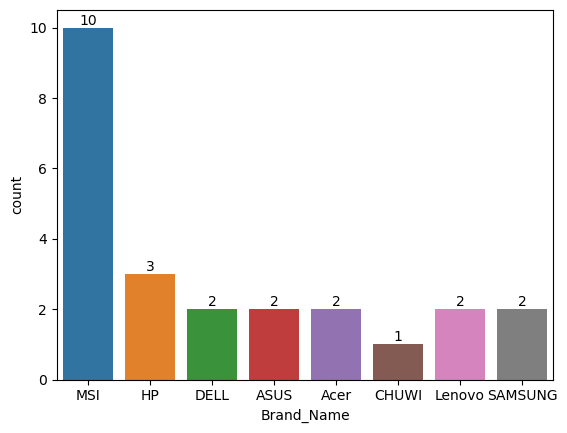

In [466]:
ax = sns.countplot(x=df['Brand_Name'])
ax.bar_label(ax.containers[0])
plt.show()

#### Top N most pricey(dis_price) laptops.

In [470]:
df.columns

Index(['Laptop_Name', 'Brand_Name', 'Discounted_Price', 'Org_Price',
       '%Discount', 'Avg_Rating', 'Total_Ratings', 'Total_Reviws', 'Processor',
       'Ram', 'Ram(HDD)', 'proc_names', 'Proc_Type', 'Proc_Gen',
       'Laptop_Name_Proper'],
      dtype='object')

In [507]:
def top_N(feat,N):
    plt.figure(figsize=(12,7))
    res = df[['Laptop_Name_Proper',feat]].sort_values(feat, ascending=False).head(N)
    ax = sns.barplot(y=res['Laptop_Name_Proper'], x=df[feat], ci=0)
    plt.title(f'Top {N} Laptop with highest {feat}')
    ax.bar_label(ax.containers[0])
    plt.tight_layout()
    plt.show()

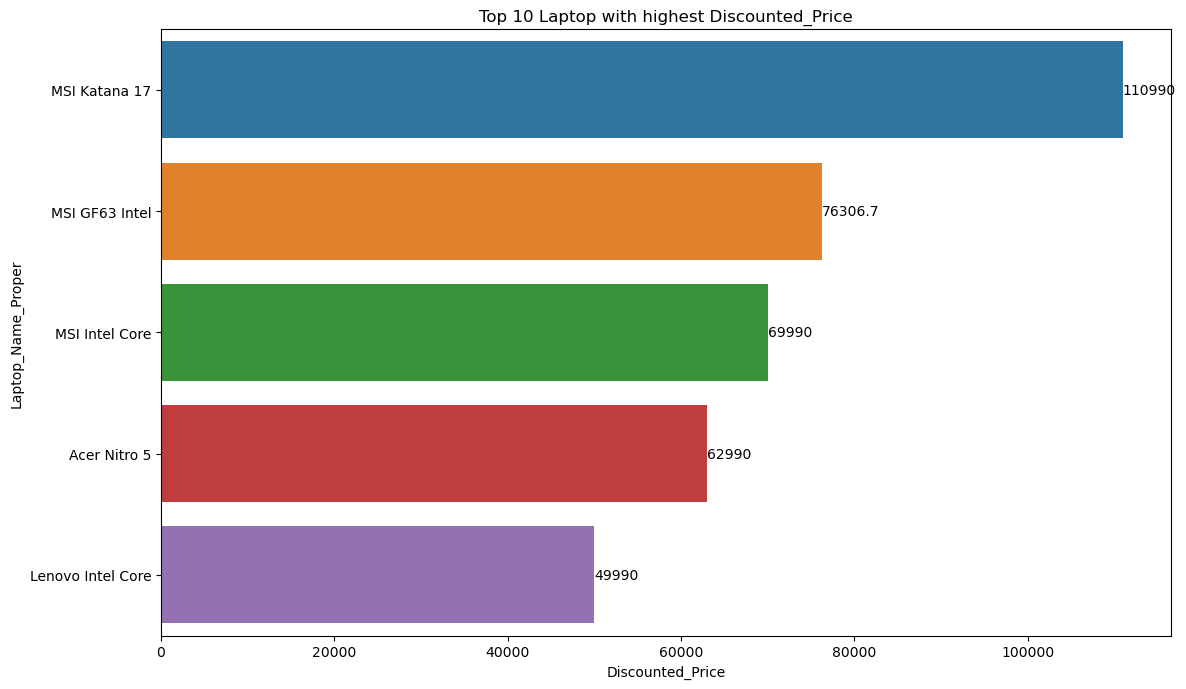

In [513]:
top_N('Discounted_Price',10)

In [514]:
res = df[['Laptop_Name_Proper','Discounted_Price']].sort_values('Discounted_Price', ascending=False).head(10)
print(res.count())
res

Laptop_Name_Proper    10
Discounted_Price      10
dtype: int64


,Laptop_Name_Proper,Discounted_Price
7,MSI Katana 17,110990
1,MSI GF63 Intel,97990
11,MSI GF63 Intel,87990
20,MSI GF63 Intel,86990
21,MSI Intel Core,69990
10,MSI GF63 Intel,66890
23,Acer Nitro 5,62990
16,MSI GF63 Intel,59990
17,MSI GF63 Intel,57990
9,Lenovo Intel Core,49990


#### Top N Laptops with highest discount.

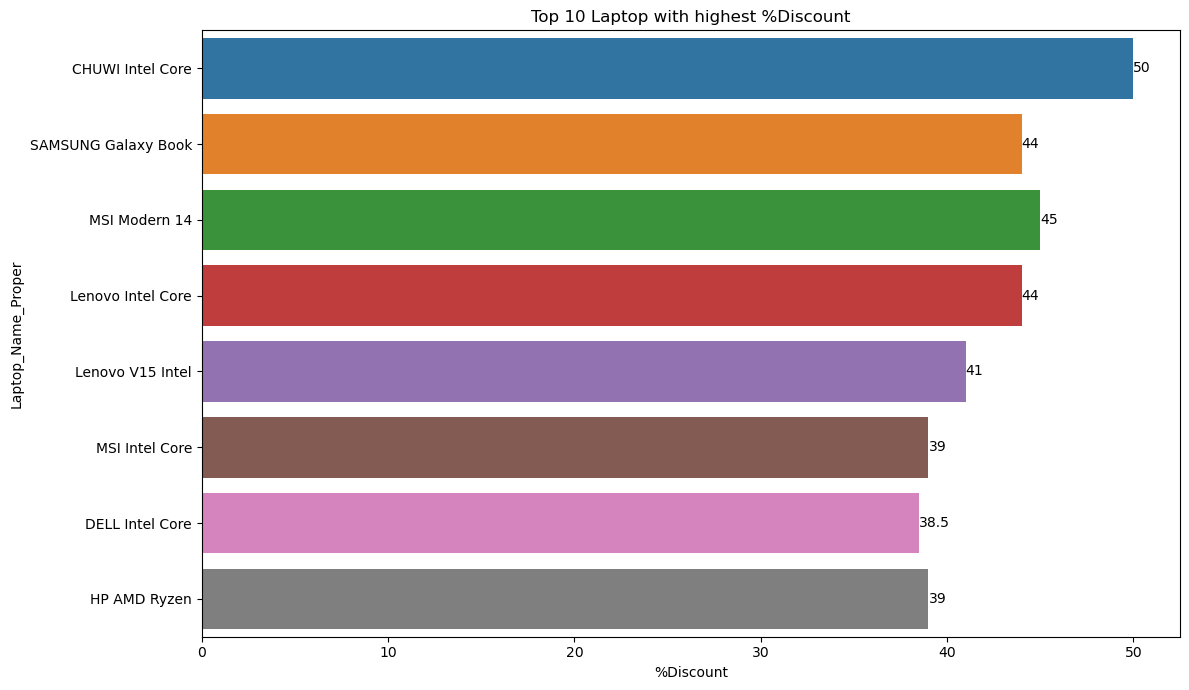

In [516]:
top_N('%Discount',10)

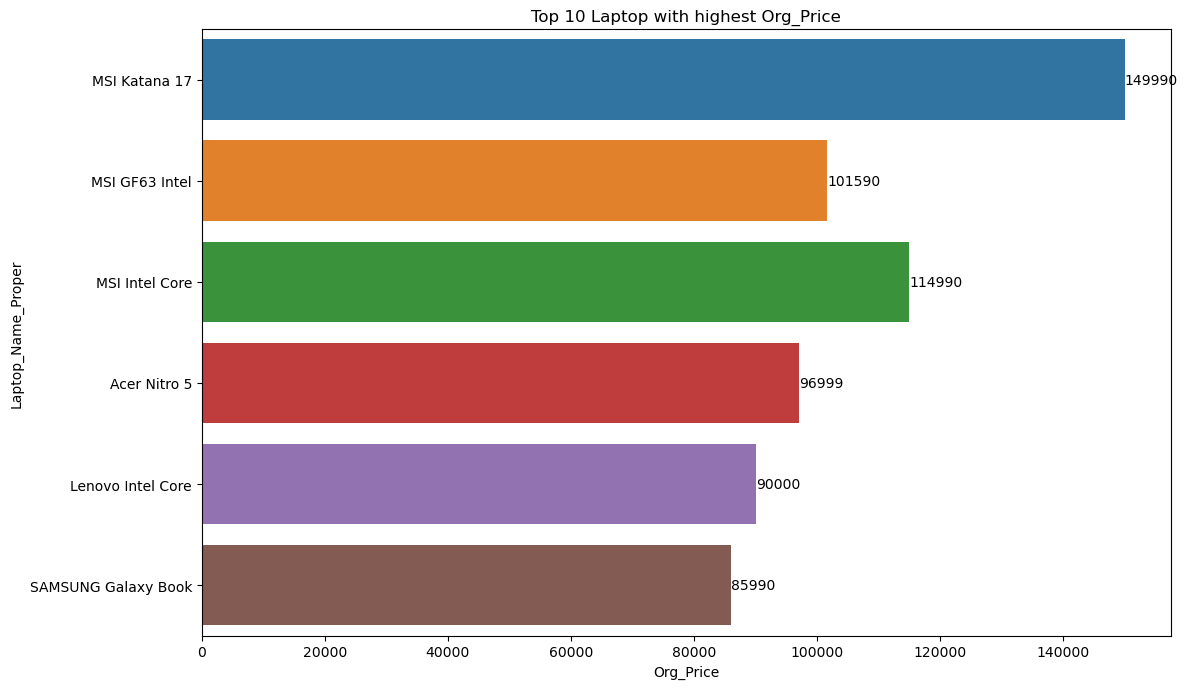

In [517]:
top_N('Org_Price',10)

In [518]:
res = df[['Laptop_Name_Proper','Org_Price']].sort_values('Org_Price', ascending=False).head(10)
print(res.count())
res

Laptop_Name_Proper    10
Org_Price             10
dtype: int64


,Laptop_Name_Proper,Org_Price
7,MSI Katana 17,149990
11,MSI GF63 Intel,115990
21,MSI Intel Core,114990
20,MSI GF63 Intel,111990
1,MSI GF63 Intel,111990
23,Acer Nitro 5,96999
9,Lenovo Intel Core,90000
12,SAMSUNG Galaxy Book,85990
17,MSI GF63 Intel,84990
10,MSI GF63 Intel,82990


#### Top N Brand wise highest sum of total ratings.

In [519]:
df.columns

Index(['Laptop_Name', 'Brand_Name', 'Discounted_Price', 'Org_Price',
       '%Discount', 'Avg_Rating', 'Total_Ratings', 'Total_Reviws', 'Processor',
       'Ram', 'Ram(HDD)', 'proc_names', 'Proc_Type', 'Proc_Gen',
       'Laptop_Name_Proper'],
      dtype='object')

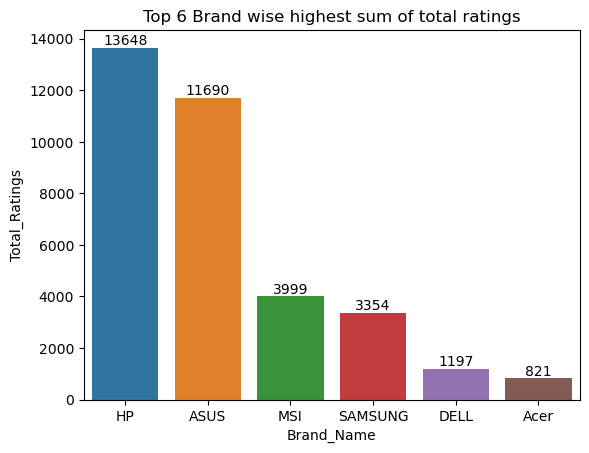

In [530]:
r1 = df.groupby('Brand_Name')['Total_Ratings'].sum().sort_values(ascending=False).reset_index()
N=6
r1 = r1.head(6)
ax=sns.barplot(y=r1['Total_Ratings'],x=r1['Brand_Name'])
ax.bar_label(ax.containers[0])
plt.title(f'Top {N} Brand wise highest sum of total ratings')
plt.show()